()
[0.6246423  0.52954641 0.58580478 0.26570277 0.33566584 0.41538368
 0.69360515 0.11929123 0.903273   0.79183121]


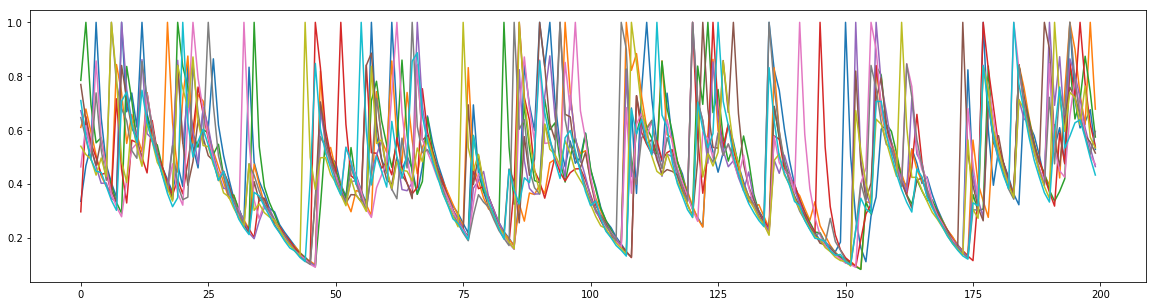

array([[0.33477009, 0.60947934, 0.78437356, ..., 0.64607879, 0.53958401,
        0.70929214],
       [0.46719236, 0.67777203, 1.        , ..., 0.56801458, 0.50865437,
        0.57478803],
       [0.54114974, 0.59155809, 0.69351738, ..., 0.48846266, 0.49204687,
        0.49151071],
       ...,
       [0.63076498, 0.62075672, 0.87400799, ..., 0.57859642, 0.76373265,
        0.57076774],
       [0.6753923 , 1.        , 0.74110723, ..., 0.51013875, 0.57324213,
        0.49708662],
       [0.52761551, 0.67741902, 0.57373938, ..., 0.59462189, 0.53323552,
        0.43245753]])

In [1]:
import numpy as np

n = 10; 
s = np.random.rand(n);
print()
T = 200;
St = np.zeros((T,n));
lam = 0.03;
# Flag para modelar interacción social
intSoc = 1;
# Impacto de la inseguridad
nu = 0.9;
# Resistencia a la inseguridad
mu = 0.5;
# Velocidad de perdida de memoria
psi = 0.9;
print(s)
for t in range(T):
    st = s;
    for k in range(n):
        # s[k] perpepción de inseguridad del sujeto k
        # Es victima del crimen
        X = np.random.poisson(lam);                
        # Hubo un delito
        if X>0: 
            s[k] = 1;        
        else:
            if intSoc == 1:
                j = np.random.randint(0, n-1);
                if j >= k:
                    j = j+1;
                
                # la percepción del vecino sobre la inseguridad es mas alta que la mia
                if s[k] < s[j]:                    
                    s[k] = psi*(st[k] - nu*(st[k] - st[j])); # aumenta mi percepción de la inseguridad
                else: # la percepción del vecino sobre la inseguridad es mas baja que la mia                    
                    s[k] = psi*(st[k] - mu*(st[k] - st[j])); # disminuye la percepción de la inseguridad mi percepción de la inseguridad
            else:
                s[k] = psi*st[k];
    St[t,:] = s;

import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.plot(St)
plt.show();
St